In [1]:
import os

---
## os.listdir()
- listdir()은 인자 내부의 파일만 출력
- 내부 파일이 폴더라면 그 내부의 파일은 출력하지 않음

In [ ]:
### 예시파일 : h&m의 images folder

In [ ]:
# folder list만 출력
def print_files_in_dir(root_dir, prefix = ""):
    files = os.listdir(root_dir)
    for file in files:
        path = os.path.join(root_dir, file)
        print(prefix + path)

if __name__ == "__main__":
    root_dir = "D:/Kaggle/H&M/images/"
    print_files_in_dir(root_dir)

In [ ]:
# recursive 처리로 모든 하위파일 출력
def print_files_in_dir(root_dir, prefix = ""):
    files = os.listdir(root_dir)
    for file in files:
        path = os.path.join(root_dir, file)
        print(prefix + path)
        if os.path.isdir(path):
            print_files_in_dir(path, prefix + "    ")

if __name__ == "__main__":
    root_dir = "D:/Kaggle/H&M/images/"
    print_files_in_dir(root_dir)

---
## os.walk
- tuple로 출력 
    1. root : dir, files가 있는 path
    2. dirs : root 아래에 있는 폴더들
    3. files : root 아래에 있는 파일들

In [ ]:
if __name__ == '__main__':
    root_dir = 'D:/Kaggle/H&M/images/'
    for (root, dirs, files) in os.walk(root_dir):
        print('# root :' + root)
        if len(dirs) > 0:
            for dir_name in dirs:
                print('dir : ' + dir_name)
        
        if len(files) > 0:
            for file_name in files:
                print('file : ' + file_name)

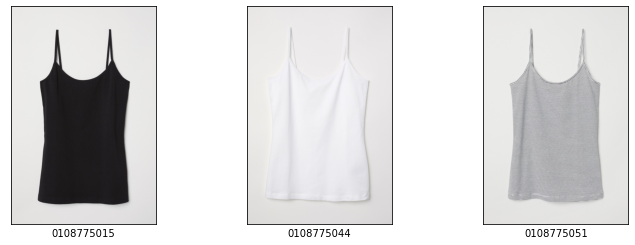

In [13]:
# image data의 선택한 폴더의 예시데이터 출력하기
from os import walk
import matplotlib.pyplot as plt

def show_images(folder_name, no_images = 3):
    root_dir = f'D:/Kaggle/H&M/images/{folder_name}/'
    # extracting all image names from a folder
    files = []
    for _, _, filenames in walk(root_dir):
        # extend : list type 인자를 개별로 풀어서 추가해줌
        files.extend(filenames)
    no_files = len(files)
    if no_images > no_files:
        no_images = no_files
        print(f'There are less images than requested.({no_files} files in folder {folder_name})')
        
    # plotting selected number of pictures
    images = files[:no_images]
    fig, ax = plt.subplots(1, no_images, figsize = (12,4))
    for i, img in enumerate(images):
        art_id = img.split('.')[0] # .jpg 뺀 product_code
        img = plt.imread(root_dir + img)
        ax[i].imshow(img, aspect = 'equal')
        # ax[i].grid(False)
        ax[i].set_xticks([],[])
        ax[i].set_yticks([],[])
        ax[i].set_xlabel(art_id)
    plt.show()
    
show_images('010')